In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mytrain = pd.read_csv('data/happiness_train_complete.csv', parse_dates=['survey_time'],encoding="GB2312" )

In [3]:
mytrain.drop( ['edu_other','invest_other','property_other','join_party',
              's_work_type','s_work_status','work_status',
              'work_yr','work_manage','work_type','id'],axis=1,inplace=True)

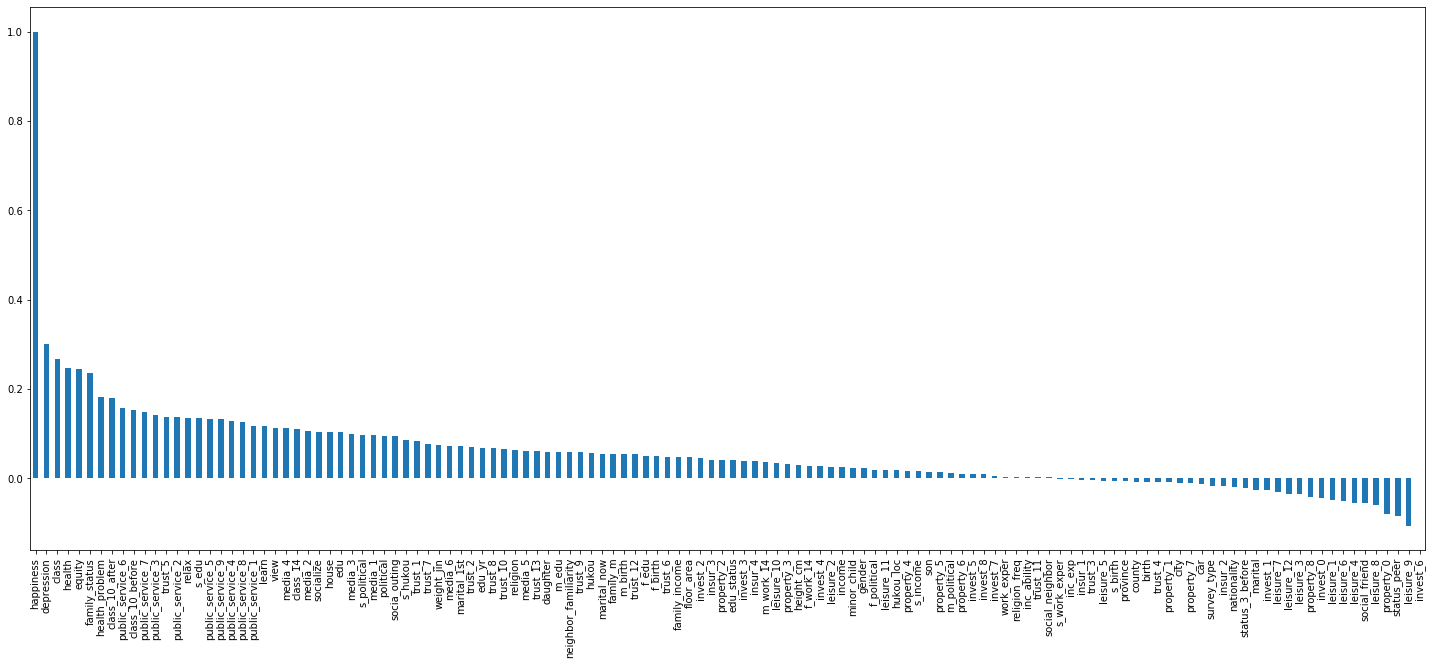

In [4]:
# pd.set_option('max_row',300) 
# mytrain.corr()['happiness'].plot()

plt.figure(figsize=(25,10))
mytrain.corr()['happiness'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [27]:
cor1=mytrain.corr()['happiness'][mytrain.corr()['happiness']<0.01]
cor1[cor1>0]

religion_freq      0.002296
social_neighbor    0.001900
work_exper         0.002564
invest_7           0.004377
invest_8           0.009244
inc_ability        0.002179
trust_11           0.001981
Name: happiness, dtype: float64

In [33]:
y_train = mytrain['happiness']
y_train = y_train.map(lambda x:3 if x==-8 else x)
mytrain['happiness']=y_train

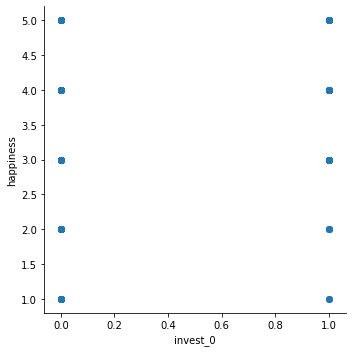

In [41]:
sns.lmplot('invest_0','happiness',mytrain,fit_reg=False)

In [ ]:
sns.countplot('class_10_after', hue='happiness', data=mytrain)

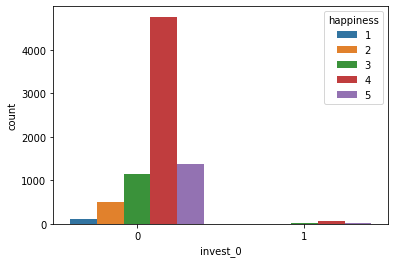

In [37]:
sns.countplot('invest_0', hue='happiness', data=mytrain)

In [4]:
mytrain['edu'] = mytrain['edu'].map(lambda x:0 if x==-8 else x)
# df_all['edu'] = df_all['edu'].map(lambda x:0 if x==14 else x)
# sns.countplot(x='edu', data=df_all)
def edu_split(x):
    if x in [1,2,14]:
        return 0
    elif x in [3]:
        return 1
    elif x in [4]:
        return 2
    elif x in [5,7,8]:
        return 3
    elif x in [6]:
        return 4
    elif x in [9,10]:
        return 5
    elif x in [11,12]:
        return 6
    elif x in[13]:
        return 7
mytrain["edu"]=mytrain["edu"].map(edu_split)

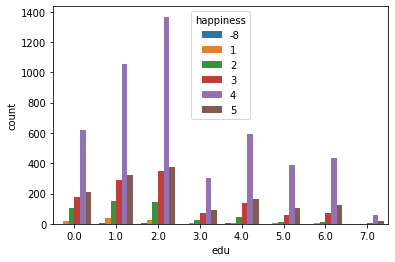

In [5]:
sns.countplot('edu', hue='happiness', data=mytrain)

In [8]:
mytrain['survey_time'] = pd.to_datetime(mytrain['survey_time'],format='%Y-%m-%d %H:%M:%S')
mytrain["hour"]=mytrain["survey_time"].dt.hour

#把一天的时间分段
def hour_cut(x):
    if 0<=x<6:
        return 0
    elif  6<=x<8:
        return 1
    elif  8<=x<12:
        return 2
    elif  12<=x<14:
        return 3
    elif  14<=x<18:
        return 4
    elif  18<=x<21:
        return 5
    elif  21<=x<24:
        return 6

    
mytrain["hour_cut"]=mytrain["hour"].map(hour_cut)

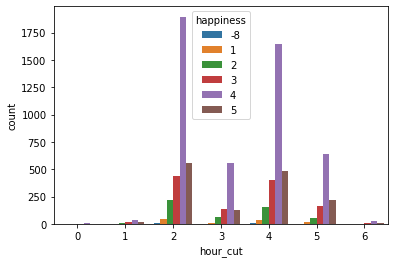

In [10]:
sns.countplot('hour_cut', hue='happiness', data=mytrain)

In [11]:
#出生的年代
def birth_split(x):
    if(x<1920):
        return 0
    if 1920<=x<=1930:
        return 1
    elif  1930<x<=1940:
        return 2
    elif  1940<x<=1950:
        return 3
    elif  1950<x<=1960:
        return 4
    elif  1960<x<=1970:
        return 5
    elif  1970<x<=1980:
        return 6
    elif  1980<x<=1990:
        return 7
    elif  1990<x<=2000:
        return 8

mytrain["birth_s"]=mytrain["birth"].map(birth_split)


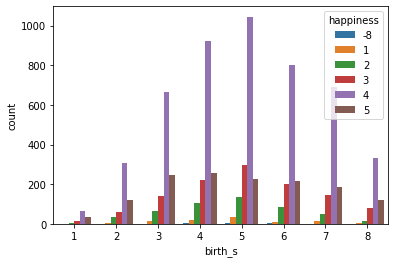

In [12]:
sns.countplot('birth_s', hue='happiness', data=mytrain)

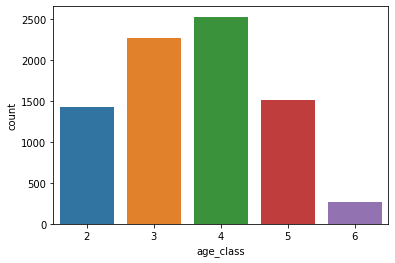

In [14]:
# 年龄划分
def age_class(x):
    if(x<0):
        return 0
    elif(x>0 and x<=16):
        return 1
    elif(x>16 and x<=32):
        return 2
    elif(x>32 and x<=48):
        return 3
    elif(x>48 and x<=64):
        return 4
    elif(x>64 and x<=80):
        return 5
    elif(80<x<=96):
        return 6
    else:
        return 7
#转换时间格式,求出每个人的年龄
mytrain['age']=pd.to_datetime(mytrain['survey_time']).dt.year-mytrain['birth']
mytrain["age_class"]=mytrain['age'].map(age_class)
sns.countplot(x='age_class', data=mytrain)

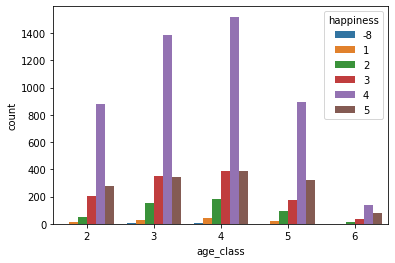

In [15]:
sns.countplot('age_class', hue='happiness', data=mytrain)

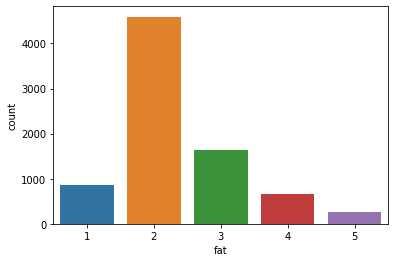

In [15]:

def  get_fat(x):
    if(x<0):
        return 1
    elif(x>0 and x<18.5):
        return 1
    elif(x>=18.5 and x<=23.9):
        return 2 
    elif(x>=24 and x<=26.9):
        return 3
    elif(x>26.9 and x<29.9):
        return 4
    else:
        return 5
height = mytrain["height_cm"]/100
kg = mytrain["weight_jin"]/2

bmi = kg/pow(height,2)

mytrain["bmi"] = bmi

mytrain["fat"] = mytrain["bmi"].map(get_fat)

sns.countplot(x='fat', data=mytrain)
#mytrain.drop(['bmi'],axis=1,inplace=True)

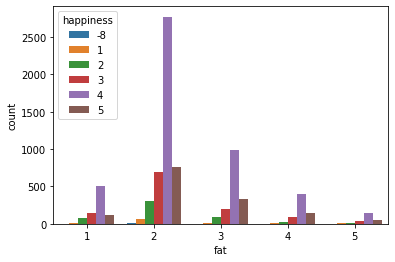

In [16]:
sns.countplot('fat', hue='happiness', data=mytrain)

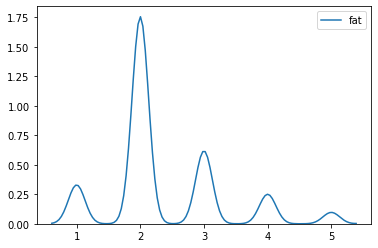

In [20]:
sns.kdeplot(mytrain['fat'])

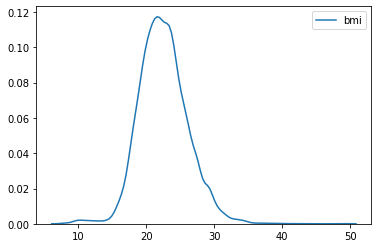

In [19]:
sns.kdeplot(mytrain['bmi'])

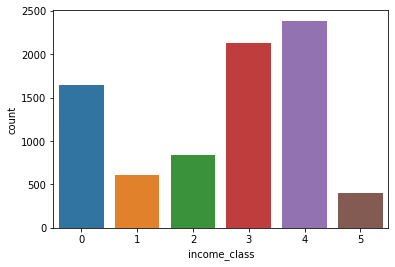

In [19]:

# 收入分级
def get_income_class(x):
    if(x<=0):
        return 0
    if 0< x < 2800:
        return  1
    elif 2800<= x <10000:
        return 2
    elif 10000 <= x <27000:
        return 3
    elif 27000<= x <100000:
        return 4
    else : return 5
#再对收入进行分级
mytrain["income"] = mytrain["income"].map(lambda x:0 if x<0 else x)
mytrain["income_class"] = mytrain["income"].map(get_income_class)
mytrain.drop(['income'],axis=1,inplace=True)
sns.countplot(x='income_class', data=mytrain)

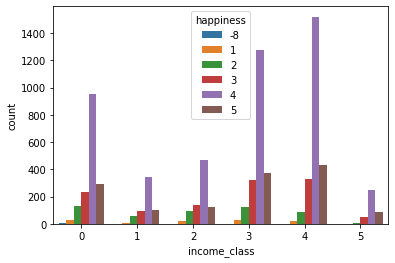

In [20]:
sns.countplot('income_class', hue='happiness', data=mytrain)

In [21]:
# 对住房面积进行划分
def floor_area_split(x):
    if(x<=0):
        return 0
    if 0<x<15:
        return 1
    elif 15<=x<30:
        return 2
    elif 30<=x<50:
        return 3
    elif 50<=x<80:
        return 4
    elif 80<=x<96:
        return 5
    elif 96<=x<110:
        return 6
    elif 110<=x<130:
        return 7
    elif 130<=x<200:
        return 8
    elif x>=200:
        return 9
mytrain["floor_area_s"]=mytrain["floor_area"].map(floor_area_split)

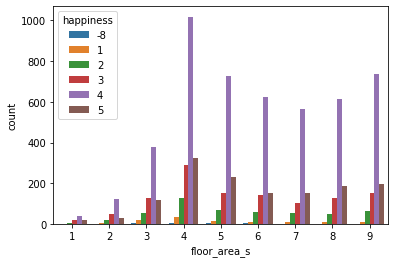

In [22]:
sns.countplot('floor_area_s', hue='happiness', data=mytrain)